EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
dfcontract = pd.read_csv('/datasets/final_provider/contract.csv')
dfinternet = pd.read_csv('/datasets/final_provider/internet.csv')
dfpersonal = pd.read_csv('/datasets/final_provider/personal.csv')
dfphone = pd.read_csv('/datasets/final_provider/phone.csv')

In [3]:
# analizando dfcontract
dfcontract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [4]:
dfcontract.sample(10)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2133,8051-HJRLT,2019-09-01,2019-10-01 00:00:00,Month-to-month,Yes,Electronic check,70.55,70.55
1600,3068-OMWZA,2019-09-01,2019-10-01 00:00:00,Month-to-month,Yes,Electronic check,88.80,88.8
1292,8390-FESFV,2014-12-01,No,Two year,No,Bank transfer (automatic),84.50,5193.2
3058,2858-MOFSQ,2018-08-01,2020-01-01 00:00:00,One year,Yes,Mailed check,55.85,937.5
463,3811-VBYBZ,2019-03-01,2019-10-01 00:00:00,Month-to-month,Yes,Electronic check,99.80,673.25
3874,4570-QHXHL,2019-05-01,No,Month-to-month,Yes,Electronic check,43.75,405.7
1011,6614-YOLAC,2014-03-01,No,Two year,No,Mailed check,58.65,4145.25
157,2749-CTKAJ,2018-04-01,No,One year,No,Mailed check,20.15,419.9
5095,7269-JISCY,2015-07-01,No,One year,No,Bank transfer (automatic),45.05,2462.6
4627,3680-CTHUH,2015-02-01,No,One year,Yes,Credit card (automatic),116.60,7049.5


In [5]:
# identificando duplicidades
dfcontract["customerID"].duplicated().sum()

0

In [6]:
# convertendo a coluna totalchargers de object para numérica
dfcontract["TotalCharges"] = pd.to_numeric(dfcontract["TotalCharges"], errors='coerce')
print(dfcontract["TotalCharges"].isnull().sum())

11


Conclusions:
- When converting the TotalCharges column to a numeric type, we identified 11 records where this column was actually a string, which have now become null values. We will discard these records.
- Since the model will use the column totalcharges as part of the features during training: null values here will interfere with or prevent the model from running properly. Initially, they are strings that cannot be converted to numeric values, and since there are only 11 problematic records out of more than 7,000 total records, I see no issue in discarding them.

In [7]:
# descartando registros com NaN
dfcontract = dfcontract.dropna(subset=['TotalCharges'])
print(dfcontract["TotalCharges"].isnull().sum())

0


Conclusions:
- We have 7,032 unique customers; 11 records were removed due to null values in `TotalCharges`.
- The `contract` dataframe contains the `EndDate` column, which is the target variable. `EndDate` has a date value when it is different from "No."
- `TotalCharges` is currently an object and needs to be converted to a float type.
- The mean of `MonthlyCharges` is 65, and the median is 70, indicating that the distribution is left-skewed, meaning that values are pulling the mean below the median.
- The standard deviation of `MonthlyCharges` is 30, which is nearly half the mean, indicating high variability in the data.
- The lowest `MonthlyCharge` is 18.25, and the highest is 118.75.
- Data scaling will not be necessary.
- `TotalCharges` has high variability, with the standard deviation nearly equal to the mean and values ranging from 18 to 8,600.

Columns in this dataframe to be considered as features for churn analysis:
- `Type`
- `PaperlessBilling`
- `PaymentMethod`
- `MonthlyCharges`
- `TotalCharges`

To-Do:
- Create a histogram for `EndDate`.
- Create a new column `EndDate Yes/No` and plot it for visualization.
- Plot a graph to analyze the dates with the most churn, including months and years.
- Create a plot for `Type`.
- Create boxplots for `MonthlyCharges` and `TotalCharges`.


In [8]:
# criando uma coluna binária para enddate
dfcontract["EndDateYN"] = np.where(dfcontract["EndDate"] != 'No', 1,0)

In [9]:
dfcontract.sample(15)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,EndDateYN
3274,2874-YXVVA,2017-04-01,No,Month-to-month,Yes,Electronic check,105.10,3634.80,0
5946,6261-RCVNS,2016-04-01,2019-10-01 00:00:00,One year,No,Credit card (automatic),73.90,3160.55,1
3180,6734-CKRSM,2019-11-01,No,Month-to-month,No,Mailed check,20.00,63.60,0
1548,5522-NYKPB,2018-01-01,No,Month-to-month,No,Electronic check,85.90,2199.05,0
2395,6486-LHTMA,2017-07-01,No,One year,Yes,Electronic check,90.70,2835.50,0
63,0557-ASKVU,2018-08-01,No,One year,Yes,Credit card (automatic),54.40,957.10,0
1427,6896-SRVYQ,2016-06-01,No,Month-to-month,No,Electronic check,73.85,3122.40,0
3074,4504-YOULA,2017-03-01,No,Month-to-month,Yes,Credit card (automatic),59.45,2136.90,0
428,4360-PNRQB,2018-08-01,No,Month-to-month,Yes,Bank transfer (automatic),75.60,1395.05,0
1411,2692-BUCFV,2017-09-01,No,Month-to-month,Yes,Bank transfer (automatic),101.45,2948.60,0


In [10]:
# verificando balanceamento de classe
dfcontract['EndDateYN'].value_counts()

0    5163
1    1869
Name: EndDateYN, dtype: int64

In [11]:
dfcontract['EndDateYN'].value_counts(normalize=True)

0    0.734215
1    0.265785
Name: EndDateYN, dtype: float64

Conclusion: Out of the 7,032 clients, 1,869 (approximately 25%) experienced churn. Therefore, we will need to perform class balancing using `class_weight` when constructing the model.


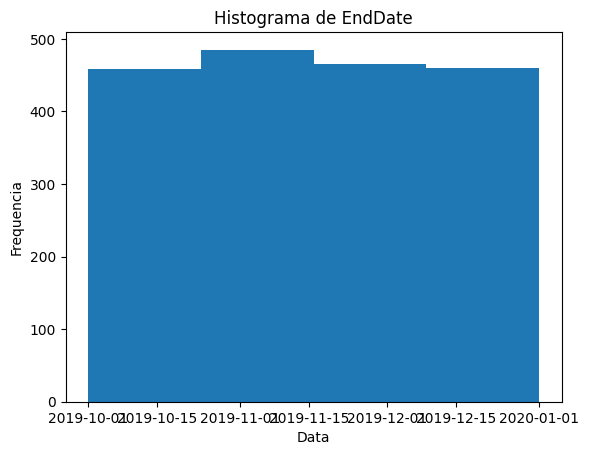

In [13]:
# criando histograma de enddate

dates = dfcontract['EndDate'][dfcontract['EndDate'] != 'No']
dates = pd.to_datetime(dates) 

plt.hist(dates.dt.date, bins=4)
plt.xlabel('Data')
plt.ylabel('Frequencia')
plt.title('Histograma de EndDate')
plt.show()

Conclusion: Churn is concentrated at the end of 2019 and beginning of 2020

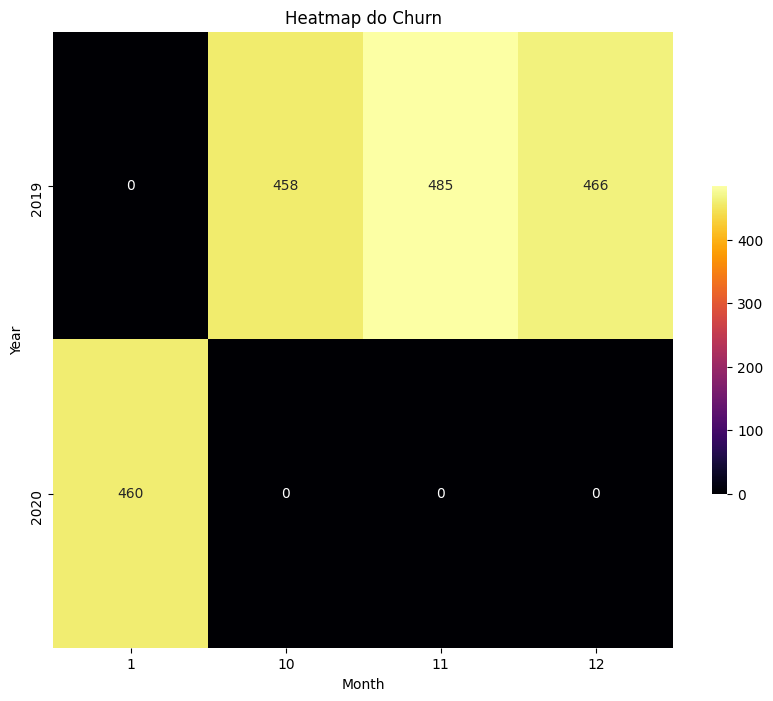

In [14]:
# criando um heatmap das datas de churn

dates2 = dfcontract['EndDate'][dfcontract['EndDate'] != 'No']
dates2 = pd.to_datetime(dates)

# create a new dataframe with the date components
date_df = pd.DataFrame({
    'year': dates2.dt.year,
    'month': dates2.dt.month,
    'day': dates2.dt.day
})

date_counts = date_df.groupby(['year', 'month', 'day']).size().reset_index(name='count')

pivot_df = date_counts.pivot_table(index='year', columns='month', values='count', fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, cmap='inferno', fmt='d', cbar_kws={'shrink': 0.5})

plt.title('Heatmap do Churn')
plt.xlabel('Month')
plt.ylabel('Year')

plt.show()

Conclusion:
- We can see a lot of churn happening in the last 4 months of 2019 and in january 2020

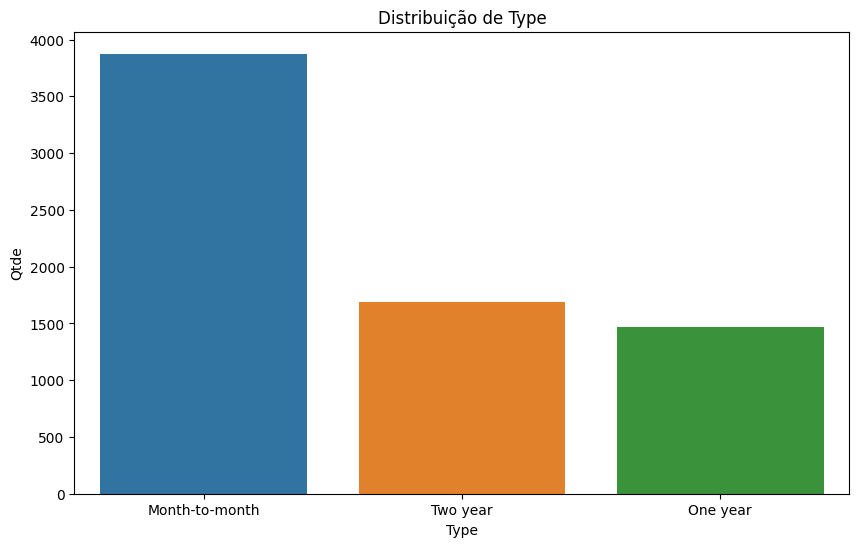

Month-to-month    0.551052
Two year          0.239619
One year          0.209329
Name: Type, dtype: float64


In [15]:
# Analizando coluna "type"

billing_counts = dfcontract['Type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=billing_counts.index, y=billing_counts.values)

plt.title('Distribuição de Type')
plt.xlabel('Type')
plt.ylabel('Qtde')

plt.show()
print(dfcontract["Type"].value_counts(normalize=True))

Conclusion: We observed that the majority of clients (55%) pay month-to-month, followed by 2-year contracts (24%), and 1-year contracts (21%). Month-to-month clients tend to generate more churn as they typically do not have termination fees or specific incentives to continue paying for the services.


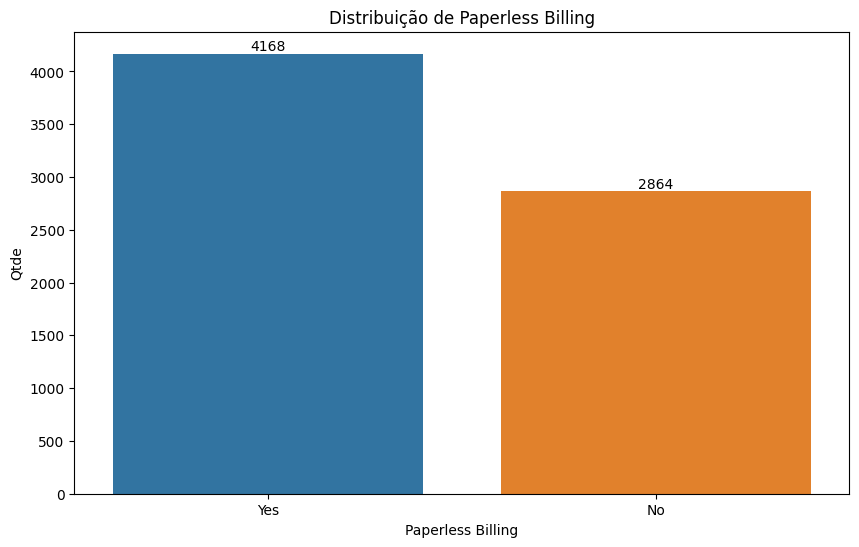

Yes    0.592719
No     0.407281
Name: PaperlessBilling, dtype: float64


In [16]:
# analizando paperless billing

paperless = dfcontract['PaperlessBilling'].value_counts()


plt.figure(figsize=(10, 6))
sns.barplot(x=paperless.index, y=paperless.values)

for i, value in enumerate(paperless.values):
    plt.text(i, value, f'{value}', ha='center', va='bottom')

plt.title('Distribuição de Paperless Billing')
plt.xlabel('Paperless Billing')
plt.ylabel('Qtde')

plt.show()
print(dfcontract["PaperlessBilling"].value_counts(normalize=True))

Conclusion:
- The majority of customers (59% or 4,168 clients) prefer paperless billing, while only 41% (2,864 clients) opt for paper billing.


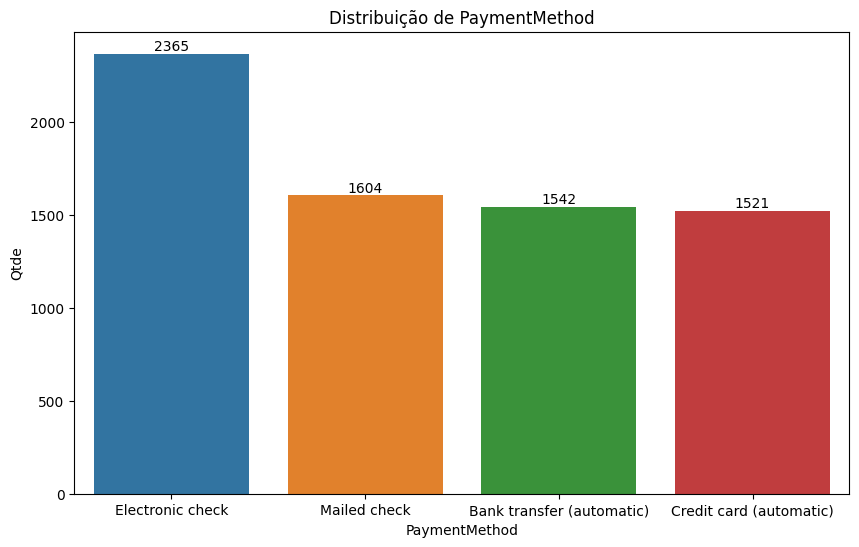

Electronic check             0.336320
Mailed check                 0.228100
Bank transfer (automatic)    0.219283
Credit card (automatic)      0.216297
Name: PaymentMethod, dtype: float64


In [17]:
# analizando payment method

paymethod = dfcontract['PaymentMethod'].value_counts()


plt.figure(figsize=(10, 6))
sns.barplot(x=paymethod.index, y=paymethod.values)

for i, value in enumerate(paymethod.values):
    plt.text(i, value, f'{value}', ha='center', va='bottom')

plt.title('Distribuição de PaymentMethod')
plt.xlabel('PaymentMethod')
plt.ylabel('Qtde')

plt.show()
print(dfcontract["PaymentMethod"].value_counts(normalize=True))

Conclusion
- The preferred payment method among customers is **Electronic Check**, with 34% (2,365 clients) opting for it. 
- The other methods are fairly equally distributed: **Mailed Check** at 23% (1,604 clients), **Bank Transfer** at 22% (1,542 clients), and **Credit Card** at 22% (1,521 clients).


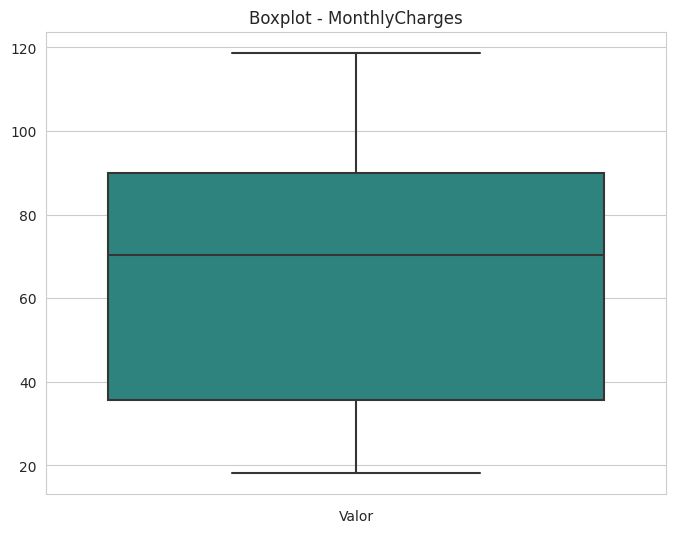

In [18]:
# criando um boxplot de monthly charges

sns.set_style('whitegrid')

plt.figure(figsize=(8, 6))
sns.boxplot(y=dfcontract['MonthlyCharges'], showfliers=True, palette='viridis')

plt.title('Boxplot - MonthlyCharges')
plt.xlabel('Valor')
plt.ylabel('')

plt.show()

Conclusion:
- We observed that the **MonthlyCharges** range from 20 to 120, with a mean of **64**, a median of **70**, and a standard deviation of **30**. The standard deviation being almost half of the mean indicates high variability in the data. However, no outliers were identified.


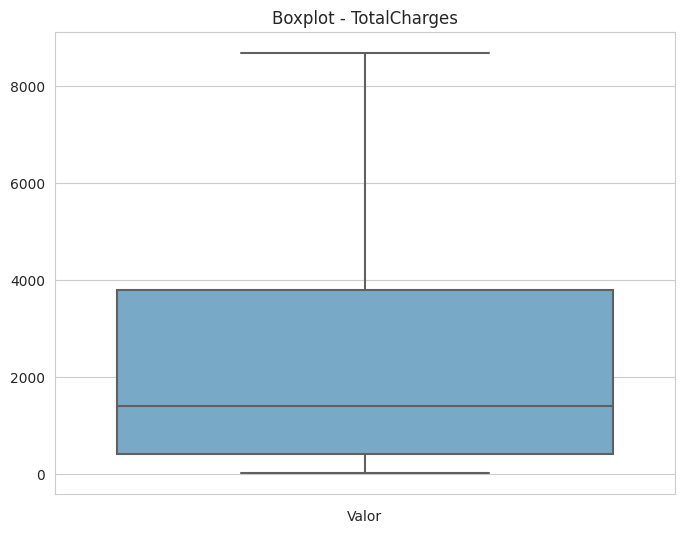

In [19]:
# criando um boxplot de total charges

sns.set_style('whitegrid')

plt.figure(figsize=(8, 6))
sns.boxplot(y=dfcontract['TotalCharges'], showfliers=True, palette='Blues')

plt.title('Boxplot - TotalCharges')
plt.xlabel('Valor')
plt.ylabel('')

plt.show()

Conclusions
- We observed that **TotalCharges** exhibits a high level of variability, with a minimum of **18**, a maximum of **8600**, and a standard deviation that is nearly equal to the mean of **2200**. 
- The median is **1397**, indicating that the distribution has a skew, with the mean significantly above the median due to higher values. 
- The boxplot confirms this distribution, showing that the data is skewed right. No outliers were identified.


In [20]:
# analizando dfinternet
dfinternet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


**Conclusion**: There are **5517 non-null values** in the `dfinternet`, all of which are of type `object` (string). This is appropriate since these columns contain either textual information or "Yes/No" categorical values.


In [21]:
dfinternet.sample(10)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
2817,7925-PNRGI,DSL,Yes,Yes,Yes,Yes,Yes,No
5221,0305-SQECB,DSL,Yes,No,No,Yes,No,No
3033,2898-LSJGD,DSL,Yes,No,Yes,No,Yes,Yes
5421,6502-MJQAE,Fiber optic,No,No,No,No,No,No
5492,1685-BQULA,Fiber optic,No,Yes,Yes,No,Yes,No
4654,3842-QTGDL,Fiber optic,Yes,Yes,No,No,No,No
119,6440-DKQGE,DSL,No,Yes,Yes,No,Yes,No
4670,9185-TQCVP,Fiber optic,No,No,No,No,No,Yes
3849,2055-BFOCC,DSL,Yes,Yes,Yes,Yes,Yes,Yes
53,0434-CSFON,Fiber optic,No,No,Yes,No,Yes,Yes


In [22]:
dfinternet["customerID"].duplicated().sum()

0

Conclusion:
- No duplicate records were found
- We have 5517 distinct customers with internet services

No     0.63404
Yes    0.36596
Name: OnlineSecurity, dtype: float64
No     0.559724
Yes    0.440276
Name: OnlineBackup, dtype: float64
No     0.560993
Yes    0.439007
Name: DeviceProtection, dtype: float64
No     0.629509
Yes    0.370491
Name: TechSupport, dtype: float64
No     0.509335
Yes    0.490665
Name: StreamingTV, dtype: float64
No     0.504803
Yes    0.495197
Name: StreamingMovies, dtype: float64


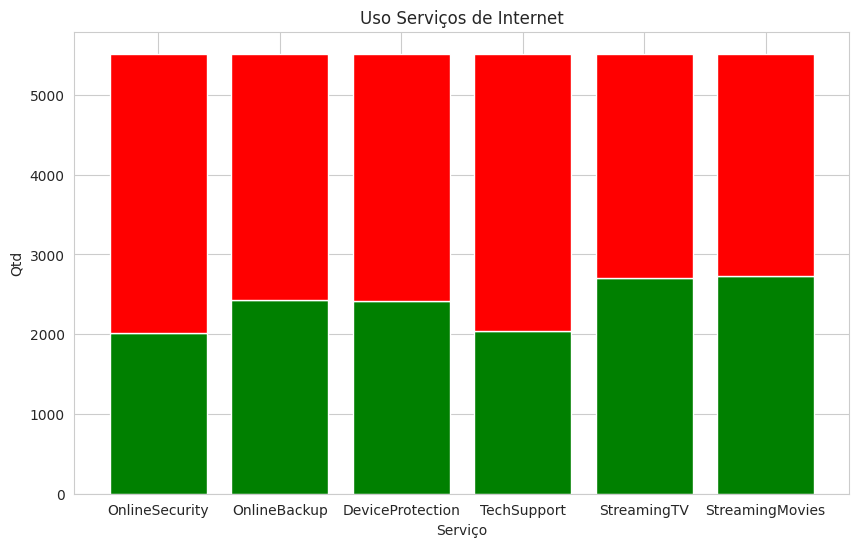

In [23]:
# Criando um gráfico para visualizar as colunas deste df

features = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, ax = plt.subplots(figsize=(10, 6))

yes_color = 'green'
no_color = 'red'

for i, feature in enumerate(features):
    yes_count = (dfinternet[feature] == 'Yes').sum()
    no_count = (dfinternet[feature] == 'No').sum()
    
    ax.bar(i, yes_count, label='Yes', color=yes_color)
    ax.bar(i, no_count, bottom=yes_count, label='No', color=no_color)
    print(dfinternet[feature].value_counts(normalize=True))

ax.set_xticks(range(len(features)))
ax.set_xticklabels(features)

ax.set_title('Uso Serviços de Internet')
ax.set_xlabel('Serviço')
ax.set_ylabel('Qtd')

# Show the plot
plt.show()

Conclusions:
- We observe that the internet services have a similar distribution.
- The least consumed service is **OnlineSecurity**, with only **36.5%** of customers subscribed, similar to **TechSupport**, which has a **37%** usage rate. This indicates that these services are not highly demanded by customers.
- The most utilized services are **StreamingTV** and **StreamingMovies**, suggesting that these are the services of greatest interest to customers.


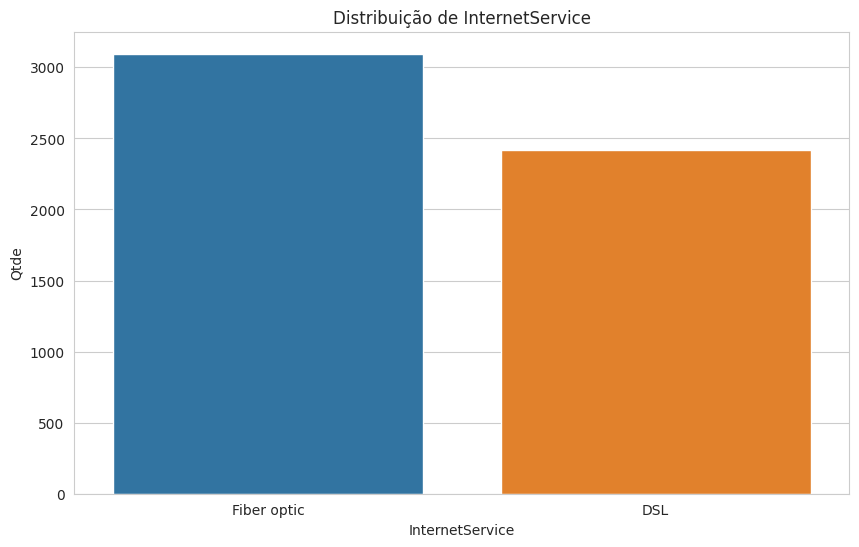

Fiber optic    0.561175
DSL            0.438825
Name: InternetService, dtype: float64


In [24]:
# analizando os tipos de serviço de internet

internet_service = dfinternet['InternetService'].value_counts()


plt.figure(figsize=(10, 6))
sns.barplot(x=internet_service.index, y=internet_service.values)

plt.title('Distribuição de InternetService')
plt.xlabel('InternetService')
plt.ylabel('Qtde')

plt.show()
print(dfinternet["InternetService"].value_counts(normalize=True))

Conclusion:
- We can observe that the **fiber optic** service is slightly more popular than **DSL**, with **56%** of customers subscribing to it. **DSL** holds **44%**, indicating a balanced distribution between these two access methods.


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Ok.
</div>

In [25]:
# analizando dfpersonal
dfpersonal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


Conclusion: We have 7043 non-null records in dfpersonal, all with data type object (string) except for senior citizen which is binary 0/1

In [26]:
dfpersonal.sample(15)

,customerID,gender,SeniorCitizen,Partner,Dependents
6643,3411-WLRSQ,Female,1,Yes,No
6173,2378-HTWFW,Male,1,No,No
3048,1728-BQDMA,Female,0,No,No
3280,6504-VBLFL,Male,0,Yes,No
5617,0816-TSPHQ,Male,0,No,No
520,5174-ITUMV,Male,0,Yes,Yes
298,2985-JUUBZ,Male,0,Yes,Yes
289,3580-REOAC,Male,0,No,No
1675,6311-UEUME,Female,0,No,No
6025,2887-JPYLU,Female,0,No,Yes


In [27]:
dfpersonal.duplicated().sum()

0

Conclusions:
- We have **7043 records** containing personal details of customers.
- No missing or duplicate values were found.
- When concatenating, the **7032 records** from `dfcontract` should pull from `dfpersonal`.

Columns to be considered as features for churn prediction:
- `gender`
- `seniorcitizen`
- `partner`
- `dependents`

To do:
- Create a chart for `gender`.
- Create a chart for `seniorcitizen`.
- Create a chart for `partner`.
- Create a chart for `dependents`.


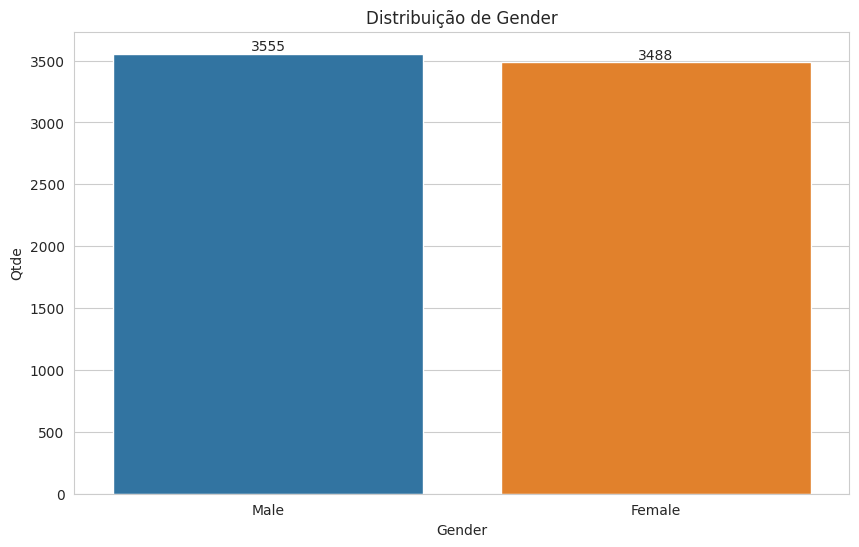

Male      0.504756
Female    0.495244
Name: gender, dtype: float64


In [28]:
# analizando gender

gender = dfpersonal['gender'].value_counts()


plt.figure(figsize=(10, 6))
sns.barplot(x=gender.index, y=gender.values)

for i, value in enumerate(gender.values):
    plt.text(i, value, f'{value}', ha='center', va='bottom')

plt.title('Distribuição de Gender')
plt.xlabel('Gender')
plt.ylabel('Qtde')

plt.show()
print(dfpersonal["gender"].value_counts(normalize=True))

Conclusion:
- The distribution of customers by gender is almost equal, with **50.47%** male and **49.52%** female, totaling around **3,500 customers** of each gender.


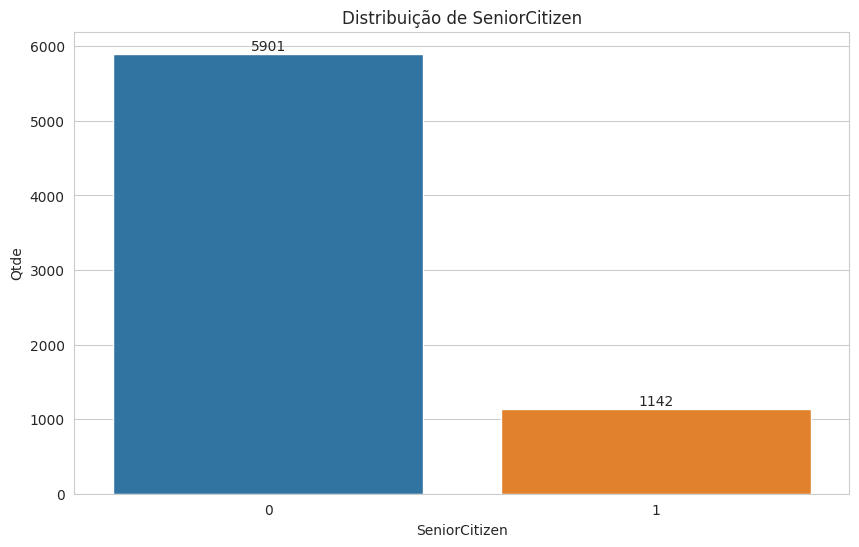

0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64


In [29]:
# analizando senior citizen

senior = dfpersonal['SeniorCitizen'].value_counts()


plt.figure(figsize=(10, 6))
sns.barplot(x=senior.index, y=senior.values)

for i, value in enumerate(senior.values):
    plt.text(i, value, f'{value}', ha='center', va='bottom')

plt.title('Distribuição de SeniorCitizen')
plt.xlabel('SeniorCitizen')
plt.ylabel('Qtde')

plt.show()
print(dfpersonal["SeniorCitizen"].value_counts(normalize=True))

Conclusion: 
- Most customers are not senior citizens, only 16% or 1142 customers are identified as seniors

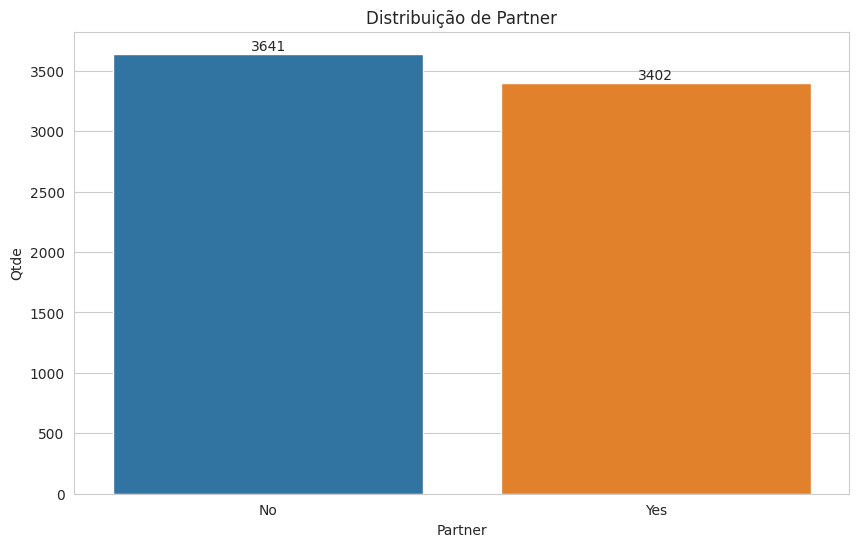

No     0.516967
Yes    0.483033
Name: Partner, dtype: float64


In [30]:
# analizando partner

partner = dfpersonal['Partner'].value_counts()


plt.figure(figsize=(10, 6))
sns.barplot(x=partner.index, y=partner.values)

for i, value in enumerate(partner.values):
    plt.text(i, value, f'{value}', ha='center', va='bottom')

plt.title('Distribuição de Partner')
plt.xlabel('Partner')
plt.ylabel('Qtde')

plt.show()
print(dfpersonal["Partner"].value_counts(normalize=True))

Conclusion:
- We have a significant number of customers identified as partners - 3402 customers or 48% of customers

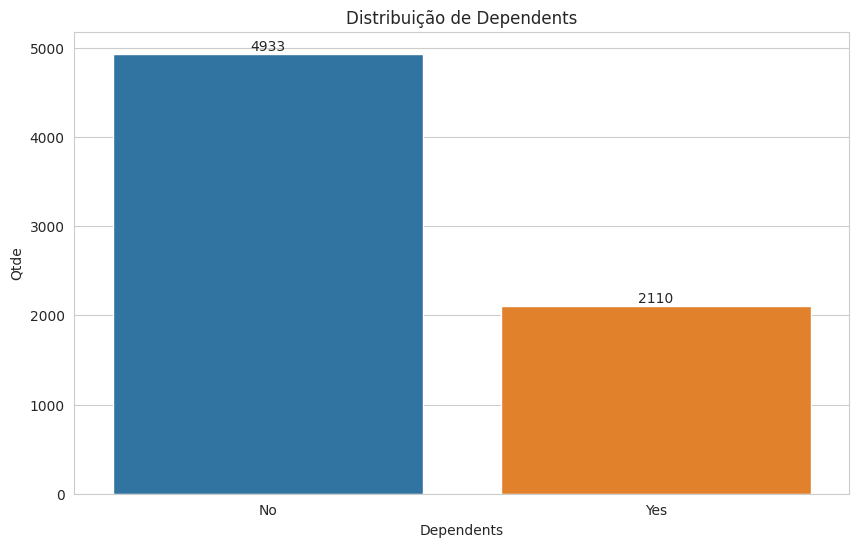

No     0.700412
Yes    0.299588
Name: Dependents, dtype: float64


In [31]:
# analisando dependents

dependents = dfpersonal['Dependents'].value_counts()


plt.figure(figsize=(10, 6))
sns.barplot(x=dependents.index, y=dependents.values)

for i, value in enumerate(dependents.values):
    plt.text(i, value, f'{value}', ha='center', va='bottom')

plt.title('Distribuição de Dependents')
plt.xlabel('Dependents')
plt.ylabel('Qtde')

plt.show()
print(dfpersonal["Dependents"].value_counts(normalize=True))

Conclusion:
- We can observe that the vast majority of customers do not have dependents—**70%** or **4,933 customers**. This suggests that they are the primary consumers of the services. Only **2,110 customers** (**30%**) have dependents.


In [32]:
# analizando dfphone
dfphone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [33]:
dfphone.sample(10)

,customerID,MultipleLines
4592,6907-NZZIJ,Yes
6138,8441-SHIPE,Yes
3243,7820-ZYGNY,Yes
3536,4521-YEEHE,Yes
1626,0516-VRYBW,No
6341,9837-FWLCH,No
1227,7073-QETQY,No
347,0224-RLWWD,No
1900,9919-FZDED,Yes
2383,1550-EENBN,Yes


In [34]:
dfphone.duplicated().sum()

0

Conclusions:
- No missing or duplicate values were found in `dfphone`.
- There are **6,361 unique customer records** indicating whether they use multiple phone lines or not.

Columns to consider for churn analysis:
- `multiplelines`


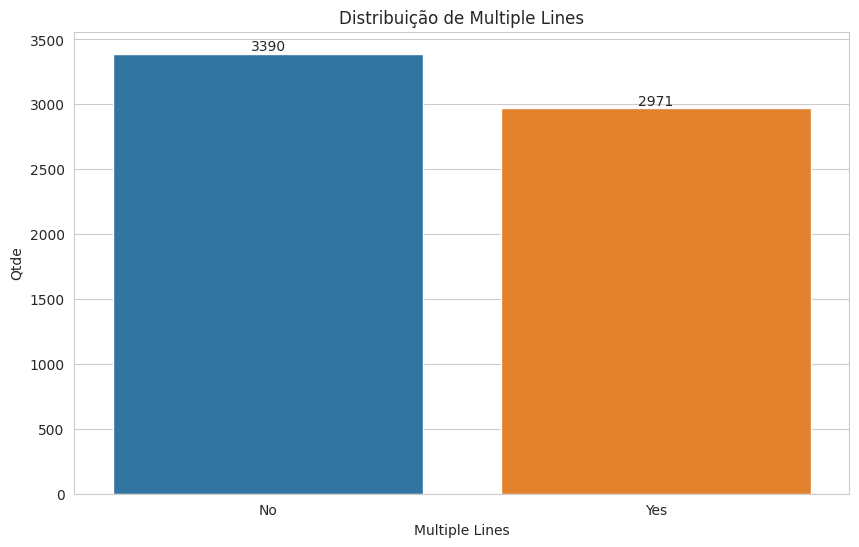

No     0.532935
Yes    0.467065
Name: MultipleLines, dtype: float64


In [35]:
# analisando MultipleLines

multilines = dfphone['MultipleLines'].value_counts()


plt.figure(figsize=(10, 6))
sns.barplot(x=multilines.index, y=multilines.values)

for i, value in enumerate(multilines.values):
    plt.text(i, value, f'{value}', ha='center', va='bottom')

plt.title('Distribuição de Multiple Lines')
plt.xlabel('Multiple Lines')
plt.ylabel('Qtde')

plt.show()
print(dfphone["MultipleLines"].value_counts(normalize=True))

Conclusion:
- We observe that the majority of customers (**53% or 3,390 customers**) do not have multiple phone lines, while **47% (or 2,971 customers)** do have multiple lines, indicating a nearly even split of this service among the customers.


**Plan for Developing the Models**

1. **Classification Problem**: Since we are dealing with a binary classification problem (churn or no churn), we will use classification models.
2. **Data Preparation**: Combine all features into a single table, using `customerID` as the key to concatenate dataframes. Only include the columns previously identified as relevant features for the model.
3. **Train-Test Split and Class Balancing**: Separate the data into training and test sets, ensuring proper class balancing since the majority of customers have not churned. Scaling the data is not necessary as the only numeric data are the monthly and total charges.
4. **Model Training**: Train various classification models including logistic regression, decision tree, random forest, gradient boosting, K-Nearest Neighbors (KNN), and neural networks. Evaluate each model using the AUC-ROC metric.
5. **Hyperparameter Tuning**: Use `GridSearchCV` to tune the hyperparameters of each model to enhance their AUC-ROC scores.
6. **Model Selection**: Choose the best model based on AUC-ROC and cross-validation performance.
